# Customer Exit Prediction from Bank

In [15]:
#Importing the libraries
import numpy as np
import pandas as pd

In [16]:
#Reading csv files
df = pd.read_csv('BankCustomers.csv')

## Exploratory Data Analysis

In [17]:
#Head of the dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
#Shape of Dataset
df.shape

#Contains 10000 rows and 14 columns

(10000, 14)

In [19]:
#Value counts of target variable
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:ylabel='Frequency'>

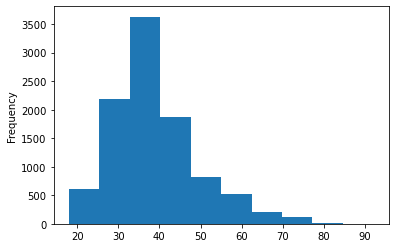

In [20]:
#Histogram of Age column
df['Age'].plot(kind='hist')

In [21]:
#People having Credit Card or not
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

#### Finding missing values

In [22]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Data Preprocessing

In [23]:
#Dropping the Unnecessary columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [24]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Handling Categorical Variables

Geography , Gender Column

In [25]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [26]:
#one hot encoding
geography = pd.get_dummies(df['Geography'],drop_first=True)

In [27]:
gender = pd.get_dummies(df['Gender'],drop_first=True)

In [28]:
df = pd.concat([df,geography,gender],axis=1)

In [29]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [62]:
df.drop(['Geography','Gender'],axis=1,inplace=True)

In [30]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Ordering Column

In [31]:
column_names_reorder = ['CreditScore', 'Germany', 'Spain','Male','Age','Tenure','Balance','NumOfProducts','HasCrCard',
       'IsActiveMember','EstimatedSalary','Exited']

In [32]:
df = df[column_names_reorder]

In [33]:
df.head()

,CreditScore,Germany,Spain,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,1,0,43,2,125510.82,1,1,1,79084.10,0


#### Creating X and y 

In [36]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']

### Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Standard Scaler

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train)

X_scaled_test = scaler.transform(X_test)

In [41]:
#Saving column names to a variables
columns = X.columns

In [42]:
columns

Index(['CreditScore', 'Germany', 'Spain', 'Male', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [44]:
#Creating dataframe for X_scaled_train
X_scaled_train = pd.DataFrame(X_scaled_train,columns=columns)

In [45]:
X_scaled_train.head()

,CreditScore,Germany,Spain,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.356500,-0.579467,-0.576388,0.913248,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670
1,-0.203898,1.725723,-0.576388,0.913248,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254
2,-0.961472,-0.579467,1.734942,0.913248,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807
3,-0.940717,-0.579467,-0.576388,-1.094993,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393
4,-1.397337,-0.579467,-0.576388,0.913248,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600


In [46]:
#Creating dataframe for X_scaled_test
X_scaled_test = pd.DataFrame(X_scaled_test,columns=columns)

In [47]:
X_scaled_test.head()

,CreditScore,Germany,Spain,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.577496,1.725723,-0.576388,0.913248,-0.655786,-0.695393,0.329937,0.808436,-1.540351,-1.025834,-1.019605
1,-0.297297,-0.579467,-0.576388,0.913248,0.390011,-1.389442,-1.218471,0.808436,0.649203,0.974817,0.798883
2,-0.525607,-0.579467,1.734942,-1.094993,0.485083,-0.348369,-1.218471,0.808436,0.649203,-1.025834,-0.727980
3,-1.511492,1.725723,-0.576388,0.913248,1.911170,1.039728,0.689272,0.808436,0.649203,0.974817,1.221387
4,-0.951094,-0.579467,1.734942,-1.094993,-1.131148,0.692704,0.782839,-0.916688,0.649203,0.974817,0.247560


## Model Building (ANN)

In [48]:
from tensorflow import keras

from keras.models import Sequential

from keras.layers import Dense

In [49]:
#Initialising the ANN
model = Sequential()

#Adding the input layer and the first hidden layer

#input_dim is the total features to predict the label
#units are the neurons in the first hidden layer
# kernel_initializer is a fancy term for which statistical distribution or function to use for initialising the weights. (0 to 1)
#In case of statistical distribution, the library will generate numbers from that statistical distribution and use as starting weights.
model.add(Dense(activation = 'relu', input_dim=11 , units = 6, kernel_initializer = 'uniform'))

#Adding second hidden layer
model.add(Dense(activation = 'relu', units=6 , kernel_initializer='uniform'))

#Adding the output layer
model.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))

#Compiling the ANN
#(binary_crossentropy used when just binary label is there to predict)(just one output)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [50]:
#Summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [52]:
#Fitting the ANN to the data
model.fit(X_scaled_train,y_train,batch_size=10,epochs=50)

Epoch 1/50
800/800 [==============================] - 1s 748us/step - loss: 0.4019 - accuracy: 0.8366
Epoch 2/50
800/800 [==============================] - 1s 806us/step - loss: 0.4018 - accuracy: 0.8357
Epoch 3/50
800/800 [==============================] - 1s 815us/step - loss: 0.4019 - accuracy: 0.8369
Epoch 4/50
800/800 [==============================] - 1s 807us/step - loss: 0.4018 - accuracy: 0.8357
Epoch 5/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4018 - accuracy: 0.8360
Epoch 6/50
800/800 [==============================] - 1s 828us/step - loss: 0.4017 - accuracy: 0.8360
Epoch 7/50
800/800 [==============================] - 1s 785us/step - loss: 0.4013 - accuracy: 0.8370
Epoch 8/50
800/800 [==============================] - 1s 778us/step - loss: 0.4018 - accuracy: 0.8351
Epoch 9/50
800/800 [==============================] - 1s 808us/step - loss: 0.4016 - accuracy: 0.8364
Epoch 10/50
800/800 [==============================] - 1s 818us/step - loss: 0.4016 

### Predictions

In [54]:
#Predicting the test results
y_pred = model.predict_classes(X_scaled_test)

C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [57]:
#Same as above
y_pred = (model.predict(X_scaled_test) > 0.5).astype("int32")

In [58]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [59]:
len(y_pred)

2000

### Evaluation Metrics

In [63]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [66]:
print(confusion_matrix(y_test,y_pred))

[[1560   47]
 [ 270  123]]


In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1607
           1       0.72      0.31      0.44       393

    accuracy                           0.84      2000
   macro avg       0.79      0.64      0.67      2000
weighted avg       0.83      0.84      0.82      2000



In [62]:
#Accuracy
accuracy_score(y_test,y_pred)

0.8415